In [22]:
import pandas as pd
from besos import eppy_funcs as ef
from besos.evaluator import EvaluatorEP
from besos.parameters import RangeParameter, FieldSelector, FilterSelector, Parameter, expand_plist, wwr, CategoryParameter, GenericSelector
from besos.problem import EPProblem
import numpy as np
import copy
from seaborn import heatmap
from seaborn import pairplot
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn
HD=0

## Parameters for E+ simulations

In [3]:
#here we're building the range within the optimization will happen

building_params= []
orientations = [180,270] #,270
WWRs = [.05, .15, .50] #
thickness = np.linspace(0.0001,0.35,10)
for orientation in orientations:
    for w in WWRs:
        for th in thickness:
            building_params.append({'Orientation': orientation,
                                             'WWR': w,
                                             'Insulation': th,
                                      
                                       })
samples = pd.DataFrame.from_dict(building_params)
samples

,Orientation,WWR,Insulation
0,180,0.05,0.000100
1,180,0.05,0.038978
2,180,0.05,0.077856
3,180,0.05,0.116733
4,180,0.05,0.155611
5,180,0.05,0.194489
6,180,0.05,0.233367
7,180,0.05,0.272244
8,180,0.05,0.311122
9,180,0.05,0.350000


## EnergyPlus simulation

In [10]:
# Build the dataframe where we save the results

results = pd.core.frame.DataFrame()
nameFile='/home/ict4bd/Desktop/Atene/idf_files/idf_files_5_01_2020/double_off_.idf'

# Extract the building object from the idf file
building = ef.get_building(nameFile)
 

# Change the insulation and orientation of the building
insulation = FieldSelector(class_name='Material', object_name='XPS Extruded Polystyrene  - CO2 Blowing_.O795', field_name='Thickness')
    
orientation = FieldSelector(class_name='Building', field_name='North Axis')

# Setup the parameters
insulationPR = Parameter(selector=insulation, value_descriptor=RangeParameter(0.0001, 0.35),
                             name='Insulation')      
window_to_wall = wwr(CategoryParameter(options=[.05,.15,.5]))

orientationPR = Parameter(selector=orientation, value_descriptor=CategoryParameter(options=[180, 270]),
                          name='Orientation')

parameters = [orientationPR, window_to_wall, insulationPR]

objectives = ['Electricity:Facility', 'DistrictHeating:Facility', 'DistrictCooling:Facility']

problem = EPProblem(parameters, objectives)

In [11]:
# This evaluator uses a Problem to modify a building, and then simulate it.
# It keeps track of the building and the weather file.
evaluator = EvaluatorEP(problem, building, out_dir='outputdir_optconf', 
                        #error_mode='Silent', 
                        err_dir='outputdir_optconf',
                        epw='/home/ict4bd/Desktop/Atene/creation_epw/GRC_Athens.167160_IWEC.epw')



In [12]:

outputs = evaluator.df_apply(samples, keep_input=True)
#Applies this evaluator to an entire dataFrame, row by row.

# :param df: a DataFrame where each row represents valid input values for this Evaluator. 
#    in this case the inputs are all the possible values of the params to be optimized
# :param keep_input: whether to include the input data in the returned DataFrame
# :param processes: amount of cores to use (only relevant when using multiprocessing)
# :param keep_dirs: whether or not keep output directory
# :return: Returns a DataFrame with one column containing the results for each objective.
        

results = results.append(outputs)
print(results)

Executing:   0%|          | 0/60 [00:00<?, ?row/s]

    Orientation   WWR  Insulation  Electricity:Facility  \
0           180  0.05    0.000100          7.016985e+09   
1           180  0.05    0.038978          7.016985e+09   
2           180  0.05    0.077856          7.016985e+09   
3           180  0.05    0.116733          7.016985e+09   
4           180  0.05    0.155611          7.016985e+09   
5           180  0.05    0.194489          7.016985e+09   
6           180  0.05    0.233367          7.016985e+09   
7           180  0.05    0.272244          7.016985e+09   
8           180  0.05    0.311122          7.016985e+09   
9           180  0.05    0.350000          7.016985e+09   
10          180  0.15    0.000100          6.948814e+09   
11          180  0.15    0.038978          6.948814e+09   
12          180  0.15    0.077856          6.948814e+09   
13          180  0.15    0.116733          6.948814e+09   
14          180  0.15    0.155611          6.948814e+09   
15          180  0.15    0.194489          6.948814e+09 

## Consumption

In [13]:
# Compute total area
total_area= 0
for Zones in building.idfobjects["Zone"]:
    total_area += float(Zones.checkrange("Floor_Area")) 
total_area

46.8578

In [14]:
#Consumption by hour

results['Electricity:Facility'] /= 3.6e6
results['DistrictHeating:Facility'] /= 3.6e6
results['DistrictCooling:Facility'] /= 3.6e6
results['TotalConsumption'] = results['DistrictHeating:Facility'] + results['DistrictCooling:Facility']
results

,Orientation,WWR,Insulation,Electricity:Facility,DistrictHeating:Facility,DistrictCooling:Facility,TotalConsumption
0,180,0.05,0.000100,1949.162542,3304.743526,2498.876664,5803.620190
1,180,0.05,0.038978,1949.162542,2541.149746,1627.547560,4168.697307
2,180,0.05,0.077856,1949.162542,2365.542740,1446.079057,3811.621797
3,180,0.05,0.116733,1949.162542,2287.330631,1365.740062,3653.070693
4,180,0.05,0.155611,1949.162542,2243.147920,1320.036788,3563.184708
5,180,0.05,0.194489,1949.162542,2215.049884,1291.028675,3506.078559
6,180,0.05,0.233367,1949.162542,2195.504127,1270.754555,3466.258682
7,180,0.05,0.272244,1949.162542,2180.979690,1255.701819,3436.681509
8,180,0.05,0.311122,1949.162542,2169.797729,1244.077810,3413.875539
9,180,0.05,0.350000,1949.162542,2160.919804,1234.734950,3395.654754


In [15]:
results = results.reset_index()
results


,index,Orientation,WWR,Insulation,Electricity:Facility,DistrictHeating:Facility,DistrictCooling:Facility,TotalConsumption
0,0,180,0.05,0.000100,1949.162542,3304.743526,2498.876664,5803.620190
1,1,180,0.05,0.038978,1949.162542,2541.149746,1627.547560,4168.697307
2,2,180,0.05,0.077856,1949.162542,2365.542740,1446.079057,3811.621797
3,3,180,0.05,0.116733,1949.162542,2287.330631,1365.740062,3653.070693
4,4,180,0.05,0.155611,1949.162542,2243.147920,1320.036788,3563.184708
5,5,180,0.05,0.194489,1949.162542,2215.049884,1291.028675,3506.078559
6,6,180,0.05,0.233367,1949.162542,2195.504127,1270.754555,3466.258682
7,7,180,0.05,0.272244,1949.162542,2180.979690,1255.701819,3436.681509
8,8,180,0.05,0.311122,1949.162542,2169.797729,1244.077810,3413.875539
9,9,180,0.05,0.350000,1949.162542,2160.919804,1234.734950,3395.654754


In [16]:
# Hourly consumption by square meter
results['Electricity:Facility'] /= total_area
results['DistrictHeating:Facility'] /= total_area
results['DistrictCooling:Facility'] /= total_area
results['TotalConsumption'] /= total_area
results

,index,Orientation,WWR,Insulation,Electricity:Facility,DistrictHeating:Facility,DistrictCooling:Facility,TotalConsumption
0,0,180,0.05,0.000100,41.597398,70.527074,53.328937,123.856011
1,1,180,0.05,0.038978,41.597398,54.231094,34.733760,88.964853
2,2,180,0.05,0.077856,41.597398,50.483436,30.861010,81.344446
3,3,180,0.05,0.116733,41.597398,48.814298,29.146483,77.960781
4,4,180,0.05,0.155611,41.597398,47.871388,28.171122,76.042510
5,5,180,0.05,0.194489,41.597398,47.271743,27.552055,74.823798
6,6,180,0.05,0.233367,41.597398,46.854614,27.119382,73.973995
7,7,180,0.05,0.272244,41.597398,46.544646,26.798139,73.342784
8,8,180,0.05,0.311122,41.597398,46.306009,26.550069,72.856078
9,9,180,0.05,0.350000,41.597398,46.116544,26.350681,72.467225


In [17]:
samples_for_plot = copy.deepcopy(results)
samples_for_plot = samples_for_plot.drop(columns=['DistrictHeating:Facility', 'DistrictCooling:Facility','TotalConsumption','Electricity:Facility','index'])
samples_for_plot

,Orientation,WWR,Insulation
0,180,0.05,0.000100
1,180,0.05,0.038978
2,180,0.05,0.077856
3,180,0.05,0.116733
4,180,0.05,0.155611
5,180,0.05,0.194489
6,180,0.05,0.233367
7,180,0.05,0.272244
8,180,0.05,0.311122
9,180,0.05,0.350000


## Find best settings (i.e. minimizing consumption)

In [27]:
# Best settings
min_value_index = results[['TotalConsumption']].idxmin()
print(results.iloc[min_value_index])

   index  Orientation   WWR  Insulation  Electricity:Facility  \
9      9          180  0.05        0.35             41.597398   

   DistrictHeating:Facility  DistrictCooling:Facility  TotalConsumption  
9                 46.116544                 26.350681         72.467225  


In [36]:
# Save best settings in a csv file
'''
results["name"]=nameFile.split("/")[-1]

if HD==0:
    results.iloc[min_value_index].to_csv('opt_results.csv', mode='a', header=True)
else:
    results.iloc[min_value_index].to_csv('opt_results.csv', mode='a', header=False)

HD=1

'''
results.columns


Index(['index', 'Orientation', 'WWR', 'Insulation', 'Electricity:Facility',
       'DistrictHeating:Facility', 'DistrictCooling:Facility',
       'TotalConsumption'],
      dtype='object')

In [46]:
fig=plt.figure(figsize=(128, 128))
outputs = results.drop(columns=['index', 'TotalConsumption']).rename(columns={
    'Insulation':'Insulation Thickness',
    'DistrictCooling:Facility':'Cooling\nConsumption', 
    'DistrictHeating:Facility':'Heating\nConsumption',
    'Electricity:Facility':'Electricity\nConsumption'
})
temp = outputs.corr()
print(temp)

                           Orientation       WWR  Insulation Thickness  \
Orientation               1.000000e+00  0.000000         -2.945832e-18   
WWR                       0.000000e+00  1.000000          0.000000e+00   
Insulation Thickness     -2.945832e-18  0.000000          1.000000e+00   
Electricity\nConsumption -1.977251e-01 -0.958025          2.034286e-17   
Heating\nConsumption     -9.279525e-02  0.004947         -7.307907e-01   
Cooling\nConsumption      9.034651e-02  0.157939         -7.111991e-01   

                          Electricity\nConsumption  Heating\nConsumption  \
Orientation                          -1.977251e-01             -0.092795   
WWR                                  -9.580246e-01              0.004947   
Insulation Thickness                  2.034286e-17             -0.730791   
Electricity\nConsumption              1.000000e+00              0.011178   
Heating\nConsumption                  1.117793e-02              1.000000   
Cooling\nConsumption     

<Figure size 9216x9216 with 0 Axes>

In [47]:
#heatmap skeleton
cmap = LinearSegmentedColormap.from_list(
    name='hm',
    colors=['lightgreen','white','salmon']
)
mask = np.zeros_like(temp, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#drop useless heatmap columns
temp = temp.drop(columns=['Cooling\nConsumption','Heating\nConsumption','Electricity\nConsumption'])
#drop useless heatmap rows
temp = temp.drop(['Insulation Thickness', 'WWR', 'Orientation'])




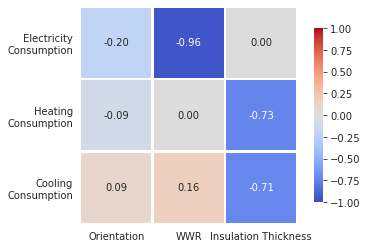

In [48]:
#heatmap generation
with seaborn.axes_style("white"):
    ax = seaborn.heatmap(
        temp, 
        annot=True, 
        fmt='.2f', 
        cmap='coolwarm',
        square=True, 
        linewidths=1.6, 
        annot_kws={"size": 10}, 
        cbar_kws={"shrink": .8},
        vmin=-1,
        vmax=1
    )
    ax.set_ylim(3, 0, .5)
    plt.yticks(rotation=0)
    plt.savefig('heatmap_double_off.png', transparent=False)